# Tutorial notebook on how to plot hex maze configurations and barrier change sequences

First let's import the functions we'll need from `src/hexmaze` (where all of our functions live)

In [1]:
import sys
sys.path.append("..")  # Use sys to add the parent directory (where src/hexmaze lives) to the path

# Import our custom plotting functions
from src.hexmaze import plot_hex_maze, plot_barrier_change_sequence

# 1. Plot a single hex maze configuration

We can use the function `plot_hex_maze` to visualize a maze configuration.

First let's take a look at the documentation for this function:

In [2]:
# View the documentation for this function
help(plot_hex_maze)

Help on function plot_hex_maze in module src.hexmaze.plotting:

plot_hex_maze(barriers=None, old_barrier: Optional[int] = None, new_barrier: Optional[int] = None, show_barriers: bool = True, show_choice_points: bool = False, show_optimal_paths: bool = False, show_arrow: bool = True, show_barrier_change: bool = True, show_hex_labels: bool = True, show_stats: bool = False, reward_probabilities: Optional[Sequence[float]] = None, show_permanent_barriers: bool = False, show_edge_barriers: bool = True, centroids: Optional[Mapping[int, tuple[float, float]]] = None, view_angle: Literal[1, 2, 3] = 1, hex_path: Optional[Sequence[int]] = None, arrows: Optional[Mapping[int, Sequence[int]]] = None, highlight_hexes: Union[set[int], Sequence[set[int]], NoneType] = None, highlight_colors: Union[str, Sequence[str], NoneType] = None, color_by: Optional[Mapping[int, float]] = None, colormap: Union[str, matplotlib.colors.Colormap] = 'plasma', vmin: Optional[float] = None, vmax: Optional[float] = None, rat

Now let's use the `plot_hex_maze` function to plot a hex maze.

This is the default way of plotting a hex maze:


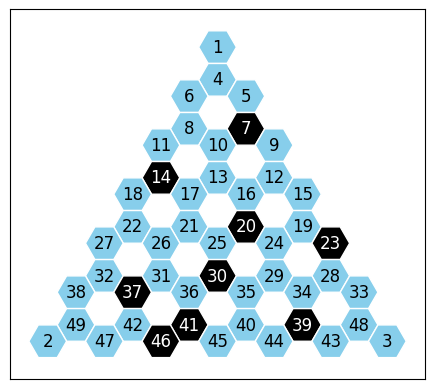

In [3]:
# Hex maze configurations are represented as a set of barriers.
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Use the function plot_hex_maze to visualize a maze configuration.
print("This is the default way of plotting a hex maze:")
plot_hex_maze(example_maze)

Open hexes are shown in light blue. Barriers are shown in black.

## Customizing the plot using different plotting options

To plot only the open hexes in the maze (and not show the barriers), add the optional argument `show_barriers=False`. This argument is True by default

To plot a maze  highlighting choice points in yellow, add the optional argument `show_choice_points=True`. This argument is False by default

To highlight the optimal paths between reward ports in green, add the optional argument `show_optimal_paths=True`. This argument is False by default

To remove the numbers labeling the hexes, add the optional argument `show_hex_labels=False`. This argument is True by default

To show the permanent barriers, add the optional argument `show_permanent_barriers=True`. This argument is False by default

To add the lengths of paths between reward ports from the plot, add the optional argument `show_stats=True`. This argument is False by default

To show the reward probabilities on the graph, add the optional argument `reward_probabilities=[pA, pB, pC]`, where pA, pB, and pC are replaced by the probability of reward at those ports.

To change the view angle of the maze (plot with hex 2 or hex 3 as the topmost hex instead of hex 1), add the optional argument `view_angle=2` or `view_angle=3`. This argument is 1 by default

Here is a maze with only open hexes shown (show_barriers=False):


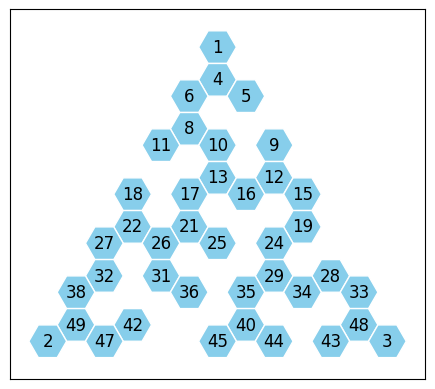

Here is a maze where critical choice points are highlighted (show_choice_points=True):


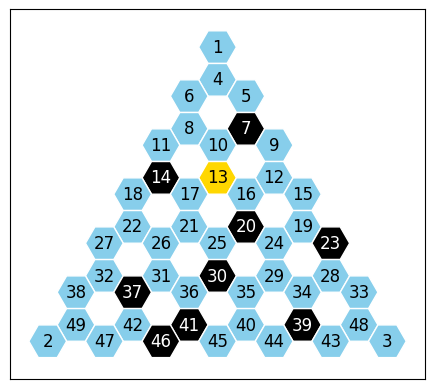

Here is a maze where hexes on optimal paths are highlighted in green (show_optimal_paths=True):


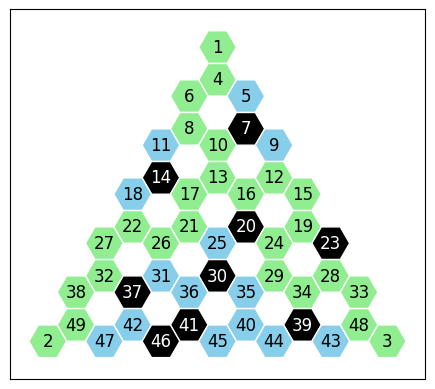

Here is a maze without hex labels (show_hex_labels=False):


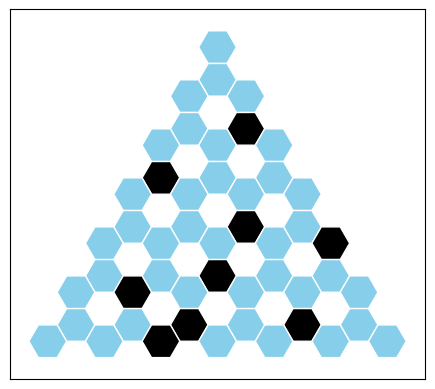

Here is a maze with the permanent barriers (show_permanent_barriers=True):


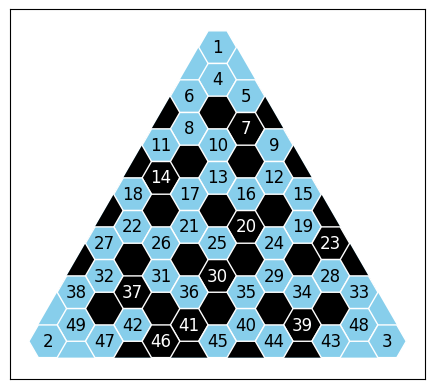

Here is a maze with path lengths shown on the plot (show_stats=True):


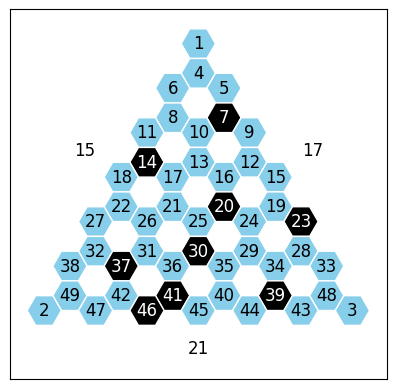

Here is a maze with reward probabilities shown on the plot (reward_probabilities=[90, 50, 50]):


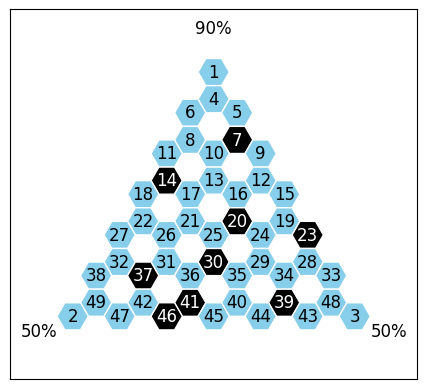

Here is the maze shown from a different angle (view_angle=2):


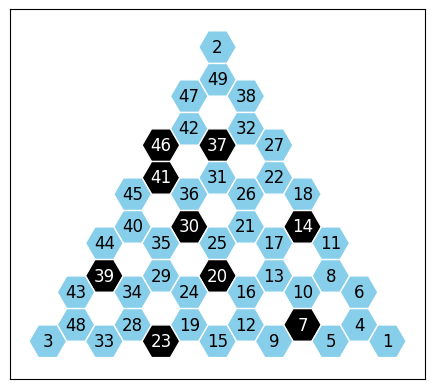

Here is the maze shown from a different angle (view_angle=3):


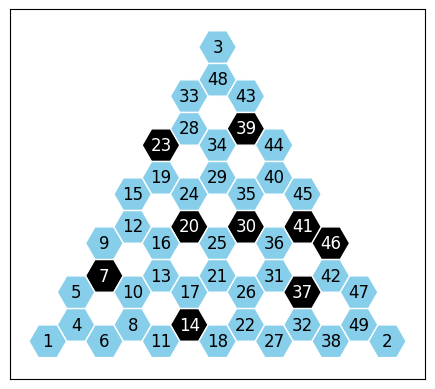

In [4]:
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Plot a hex maze without showing the barriers (only show open hexes)
print("Here is a maze with only open hexes shown (show_barriers=False):")
plot_hex_maze(example_maze, show_barriers=False)

# Plot a hex maze highlighting the critical choice point(s)
print("Here is a maze where critical choice points are highlighted (show_choice_points=True):")
plot_hex_maze(example_maze, show_choice_points=True)

# Plot a hex maze highlighting the optimal paths between reward ports in green
print("Here is a maze where hexes on optimal paths are highlighted in green (show_optimal_paths=True):")
plot_hex_maze(example_maze, show_optimal_paths=True)

# Plot a hex maze without hex labels
print("Here is a maze without hex labels (show_hex_labels=False):")
plot_hex_maze(example_maze, show_hex_labels=False)

# Plot a hex maze including the permanent barriers
print("Here is a maze with the permanent barriers (show_permanent_barriers=True):")
plot_hex_maze(example_maze, show_permanent_barriers=True)

# Add the lengths of optimal paths between reward ports from the plot
print("Here is a maze with path lengths shown on the plot (show_stats=True):")
plot_hex_maze(example_maze, show_stats=True)

# Add the reward probabilties to the plot
print("Here is a maze with reward probabilities shown on the plot (reward_probabilities=[90, 50, 50]):")
plot_hex_maze(example_maze, reward_probabilities=[90, 50, 50])

# Change the view angle of the maze!
print("Here is the maze shown from a different angle (view_angle=2):")
plot_hex_maze(example_maze, view_angle=2)
print("Here is the maze shown from a different angle (view_angle=3):")
plot_hex_maze(example_maze, view_angle=3)

## Coloring hexes by a gradient of values

To color hexes by some value, use optional argument `color_by` with dict of {hex id: value to color by}. Useful for hex distance from a port, state value, average dopamine in a hex... so many options!

The default colormap is `plasma`, but specify any matplotlib colormap with argument `colormap`.

You can optionally specify the min and/or max values for the colormap using `vmin` and `vmax`. This can be especially useful for some colormaps where the lowest end goes to white - you might want to change this so your low values don't blend with the background! (Or just use a different colormap).

**NOTE:** If you want, you can combine `color_by` with any other coloring arguments. Other coloring (such as in `highlight_hexes`) will take precedence over `color_by`.

Hex maze colored by hex distance from port 2 (colormap='viridis'):


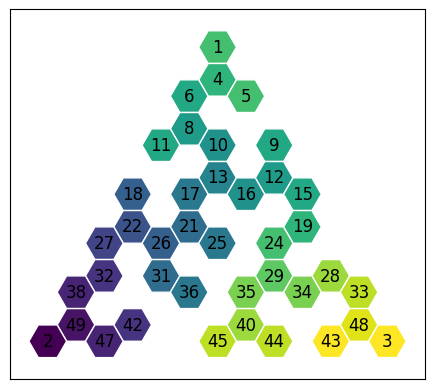

Hex maze with hexes on the rat's path colored by hex distance from port 2 (default colormap):


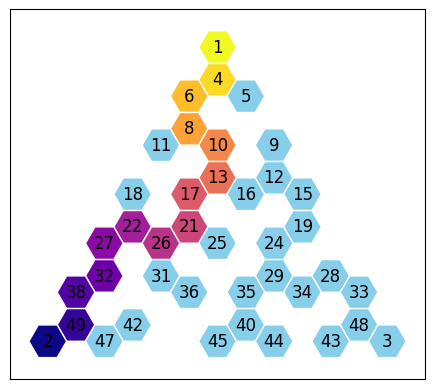

In [5]:
from src.hexmaze import get_hexes_from_port, get_optimal_paths

example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Set up a dictionary of hex: distance from port 2
maze_hexes = set(range(1, 50)) - example_maze
hex_dist_dict_1 = {h: get_hexes_from_port(example_maze, h, 2) for h in maze_hexes}

# Plot the maze with hexes colored by distance from the port, using colormap viridis
print("Hex maze colored by hex distance from port 2 (colormap='viridis'):")
plot_hex_maze(example_maze, color_by=hex_dist_dict_1, colormap='viridis', show_barriers=False)

# Set up a dictionary of hex: distance from port 2 (for hexes on the path from port 1 to port 2)
hex_path = get_optimal_paths(example_maze, 1, 2)[0]
hex_dist_dict_2 = {h: get_hexes_from_port(example_maze, h, 2) for h in hex_path}

# Plot the maze with hexes colored by distance from the port, using the default colormap (plasma)
print("Hex maze with hexes on the rat's path colored by hex distance from port 2 (default colormap):")
plot_hex_maze(example_maze, color_by=hex_dist_dict_2, show_barriers=False)

## Showing a path through the maze

Use the optional argument `hex_path` to display a path the rat took through the maze with arrows from hex to hex.

This works better with `show_hex_labels=False` because it gets messy with the hex numbers and the arrows.

Hex maze with the rat's path from port A to port C shown:


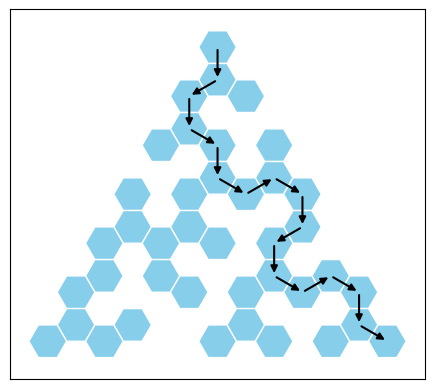

In [6]:
example_maze_1 = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Example path a rat may have taken through the maze
hex_path_1a = [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]

# Plot the maze with this path indicated by arrows
print("Hex maze with the rat's path from port A to port C shown:")
plot_hex_maze(example_maze_1, hex_path=hex_path_1a, show_barriers=False, show_hex_labels=False)

Hex maze with the rat's path from port A to port C shown, where he backtracks a few times:


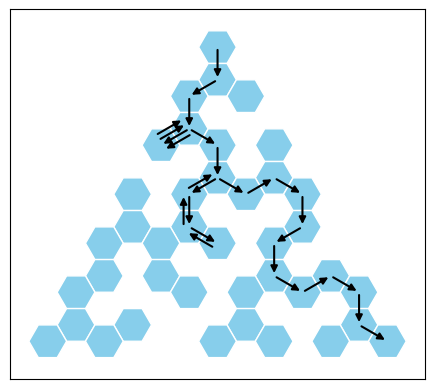

Hex maze with the rat's path from port A to port B shown, where he runs around a loop twice:


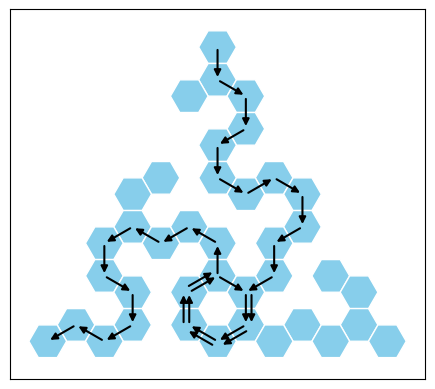

In [7]:
# This can also be used to show backtracks and loops!

# Example path a rat may have taken through the maze, where he backtracks a few times
example_maze_1 = {37, 7, 39, 41, 14, 46, 20, 23, 30}
hex_path_1b = [1, 4, 6, 8, 11, 8, 11, 8, 10, 13, 17, 21, 25, 21, 17, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]
print("Hex maze with the rat's path from port A to port C shown, where he backtracks a few times:")
plot_hex_maze(example_maze_1, hex_path=hex_path_1b, show_barriers=False, show_hex_labels=False)

# Another example maze and example path, where the rat goes around a loop
example_maze_2 = {8, 9, 11, 17, 20, 23, 31, 34, 38, 46}
hex_path_2 = [1,4,5,7,10,13,16,12,15,19,24,29,35,40,45,41,36,30,35,40,45,41,36,30,25,21,26,22,27,32,37,42,47,49,2]
print("Hex maze with the rat's path from port A to port B shown, where he runs around a loop twice:")
plot_hex_maze(example_maze_2, hex_path=hex_path_2, show_barriers=False, show_hex_labels=False)

## Drawing arbitrary arrows on the hex maze

We may want to draw other arrows on the hex maze that do not represent a hex path. The optional argument `arrows` takes a dictionary of int: list[int], mapping a start hex to one or more target hexes. Grey arrows will be drawn from each start hex to all of its target hexes.

This is especially useful for visualizing neural representations (i.e. what locations the rat was representing, or "thinking about", as he moves through the maze).

Hex maze with the rat's neural representations indicated by arrows:


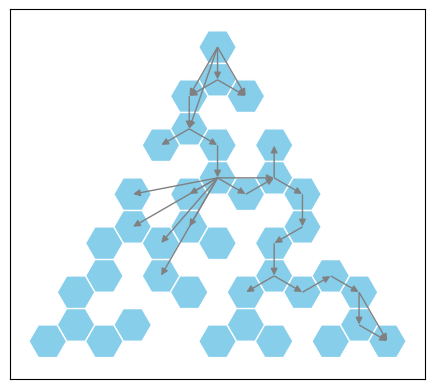

Hex maze with the rat's hex path (black) and neural representations (grey) indicated by arrows:


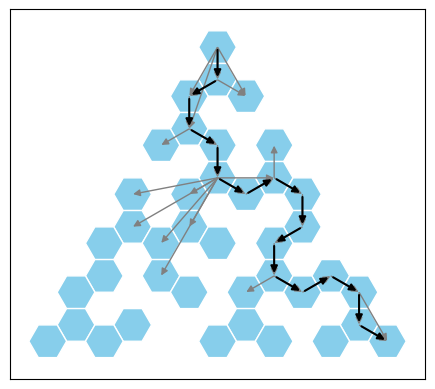

In [8]:
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Example path a rat may have taken through the maze
example_hex_path = [1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, 34, 28, 33, 48, 3]

# Example dictionary mapping the hex the rat was in to the decoded hex locations of his neural representation
# (i.e. the hex the rat was in, to the hexes he was "thinking about" while in that hex)
example_hex_representations = {
    1:[4,5,6,8], 
    4:[5,6], 
    6:[8], 
    8:[10,11], 
    10:[13], 
    13:[17, 21, 26, 31, 22, 18, 16, 12], 
    16:[12], 
    12:[15,9], 
    15:[19], 
    19:[24], 
    24:[29], 
    29:[35, 34], 
    34:[28], 
    28:[33], 
    33:[48, 3], 
    48:[3], 
}

# Plot the maze with the rat's neural representations indicated by arrows
print("Hex maze with the rat's neural representations indicated by arrows:")
plot_hex_maze(example_maze, arrows=example_hex_representations, show_barriers=False, show_hex_labels=False)

# Now add the rat's hex path in addition to his neural representations
print("Hex maze with the rat's hex path (black) and neural representations (grey) indicated by arrows:")
plot_hex_maze(example_maze, hex_path=example_hex_path, arrows=example_hex_representations, show_barriers=False, show_hex_labels=False)

## Adding a rat to the maze

Use the optional argument `rat` to plot a long evans rat on the maze.
Specify the hex to plot the rat at (e.g. `rat=10` plots the rat at hex 10)

Additional arguments `rat_to` and `rat_from` can be used to specify the (hex) direction the rat is facing

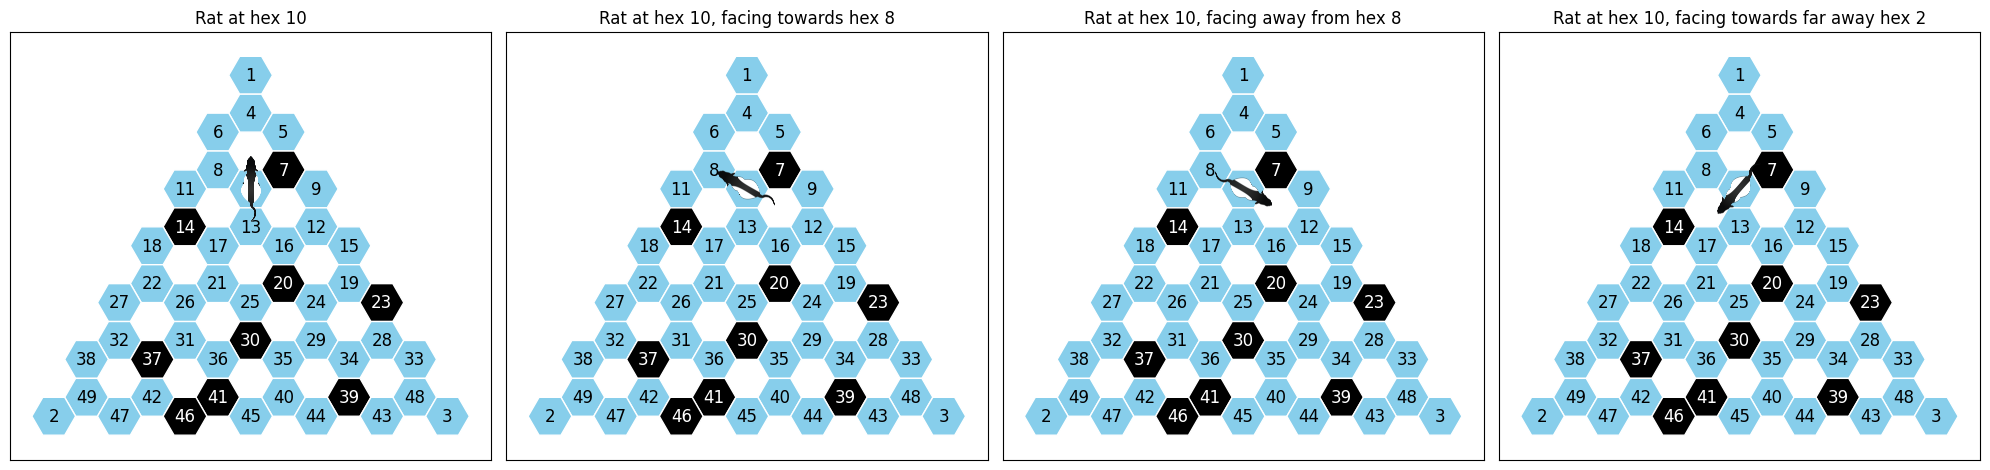

In [9]:
import matplotlib.pyplot as plt

example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Set up subplots so we can view the mazes next to each other
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()

# Plot hex maze with rat at hex 10 (rat faces up if no direction specified)
axes[0].set_title('Rat at hex 10')
plot_hex_maze(example_maze, ax=axes[0], rat=10)

# Use rat_to=hex to choose the hex the rat is facing towards
axes[1].set_title('Rat at hex 10, facing towards hex 8')
plot_hex_maze(example_maze, ax=axes[1], rat=10, rat_to=8)

# Or use rat_from=hex to choose the hex the rat is facing away from
axes[2].set_title('Rat at hex 10, facing away from hex 8')
plot_hex_maze(example_maze, ax=axes[2], rat=10, rat_from=8)

# Both rat_to and rat_from also work using barrier hexes or far away hexes (to/from hex does not have to be adjacent)
axes[3].set_title('Rat at hex 10, facing towards far away hex 2')
plot_hex_maze(example_maze, ax=axes[3], rat=10, rat_to=2)
    
plt.tight_layout()
plt.show()

## Highlighting hexes in different colors

Optional arguments `highlight_hexes` and `highlight_colors` allow you to color maze hexes however you want. `highlight_hexes` should be a single set of hexes to highlight, or a list of sets to highlight. If specifying a single set, the hexes will be colored in darkorange by default, but you can specify any color you want in `highlight_colors`. For a list of sets to highlight, `highlight_colors` must be a list at least as long as `highlight_hexes` specifying the color to use for each group.

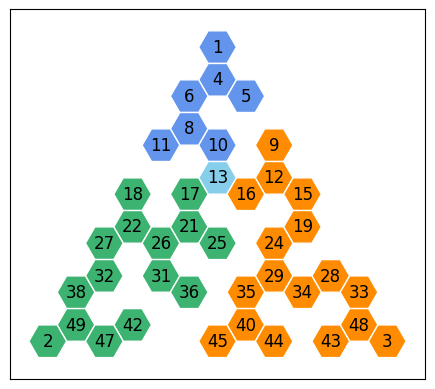

In [10]:
from src.hexmaze import divide_into_thirds

example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Divide the maze into thirds (returns a list[set])
maze_thirds = divide_into_thirds(example_maze)

# List of colors the same length as maze_thirds
thirds_colors = ['cornflowerblue', 'mediumseagreen', 'darkorange']

# Plot the maze with each third highlighted
plot_hex_maze(example_maze, highlight_hexes=maze_thirds, highlight_colors=thirds_colors, show_barriers=False)

# Note that hexes that are not a part of any of the highlight groups will be plotted in the default light blue

## Combining plot arguments

These arguments can be combined in any combination to produce the hex maze graph of your dreams!

Here is a maze where only open hexes are shown, choice points are marked, 
hexes on optimal paths are highlighted in green, and path lengths are shown on the plot. 
(show_choice_points=True, show_barriers=False, show_optimal_paths=True)


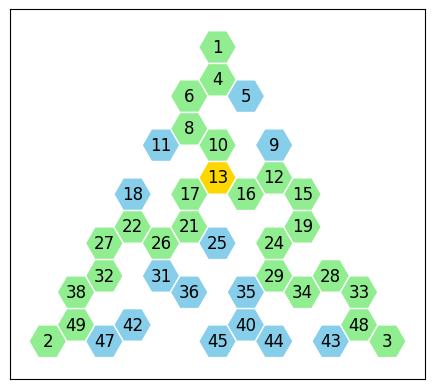

Here is a maze where permanent barriers are shown and all labels are removed from the plot. 
(show_permanent_barriers=True, show_hex_labels=False)


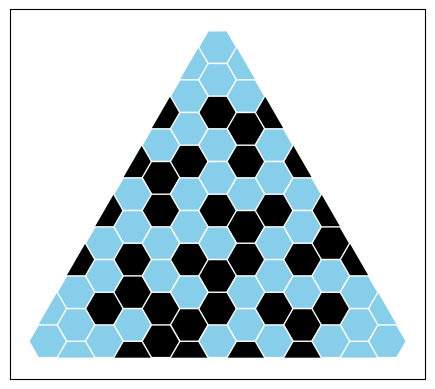

Here is a maze without any barriers or hex labels. 
A rat's hex path is shown by a gradient of colors behind him, and his options are indicated by arrows.


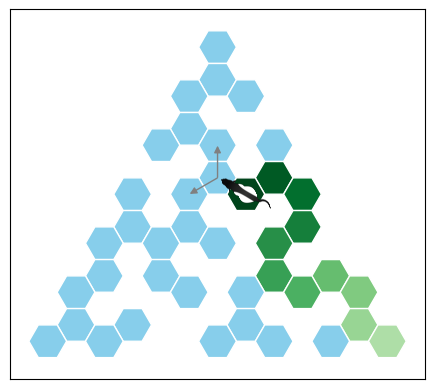

In [11]:
from src.hexmaze import get_hex_distance, get_optimal_paths

# Show some possible combinations of plot arguments!
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Plot a hex maze showing critical choice points, only showing open hexes, 
# and highlighting optimal paths in green
print("Here is a maze where only open hexes are shown, choice points are marked, \n"
"hexes on optimal paths are highlighted in green, and path lengths are shown on the plot. \n"
"(show_choice_points=True, show_barriers=False, show_optimal_paths=True)")
plot_hex_maze(example_maze, show_choice_points=True, 
              show_barriers=False, show_optimal_paths=True)

# Plot a hex maze showing permanent barriers, removing hex labels
print("Here is a maze where permanent barriers are shown and all labels are removed from the plot. \n"
"(show_permanent_barriers=True, show_hex_labels=False)")
plot_hex_maze(example_maze, show_permanent_barriers=True, show_hex_labels=False)

# Plot a hex maze showing the rat with the rat's path using a color gradient, and arrows to show his next options
rat_hex_path = get_optimal_paths(example_maze, start_hex=3, target_hex=16)[0]
rat_hex_path_distances = {h: get_hex_distance(example_maze, start_hex=16, target_hex=h) for h in rat_hex_path}
rat_options =  {13 :[10, 17]}

print("Here is a maze without any barriers or hex labels. \n"
      "A rat's hex path is shown by a gradient of colors behind him, and his options are indicated by arrows.")
plot_hex_maze(example_maze, show_barriers=False, show_hex_labels=False, rat=16, rat_to=13, 
              color_by=rat_hex_path_distances, colormap="Greens_r", vmax=15, arrows=rat_options)

## Plotting a hex maze with custom centroids

Specify custom centroids in a dictionary of hex: (x,y). The dictionary must include all 49 hexes. Use the argument `centroids=your_centroids_dict`.

Hexes will be auto-scaled based on how close they are to other hexes.

Note that when plotting based on centroids that come from video pixel coordinates, the maze will appear upside down. This is because video pixels define (0,0) as the upper left corner of the frame. To flip the maze, simply use the argument `invert_yaxis=True`

We can use all of the other plot arguments and it works the same!

A hex maze with custom centroids. Only open hexes shown


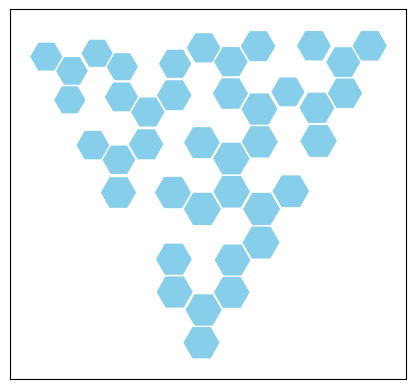

A hex maze with custom centroids. Optimal paths and stats shown. Y-axis inverted


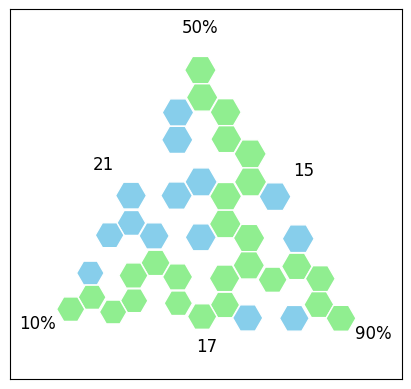

A hex maze with custom centroids. Hex labels and permanent barriers shown. Y-axis inverted


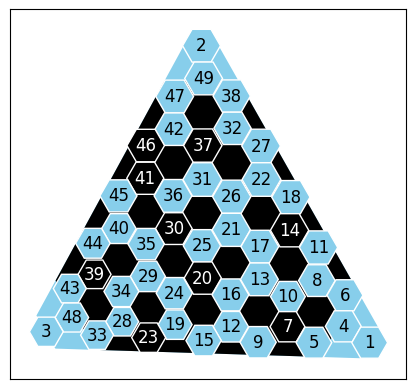

In [12]:
import pandas as pd

# Load hex centroids from a csv file. Includes all 49 hexes.
# These centroids are from a hex maze video
hex_centroids_file = "example_data/hex_centroids_from_maze_video.csv"
# Convert to a dict of hex: (x, y) centroid
centroids_df = pd.read_csv(hex_centroids_file)
centroids_dict = centroids_df.set_index('hex')[['x', 'y']].apply(tuple, axis=1).to_dict()

# Our example maze to plot
example_maze = {37, 7, 39, 41, 14, 46, 20, 23, 30}

# Plot the hex maze with no barriers and no labels
print("A hex maze with custom centroids. Only open hexes shown")
plot_hex_maze(barriers=example_maze, centroids=centroids_dict, show_barriers=False, show_hex_labels=False)

# Invert the y axis and add stats
print("A hex maze with custom centroids. Optimal paths and stats shown. Y-axis inverted")
plot_hex_maze(barriers=example_maze, centroids=centroids_dict, show_barriers=False, show_hex_labels=False, 
              show_stats=True, reward_probabilities=[90, 50, 10], show_optimal_paths=True, invert_yaxis=True)

# Show permanent barriers - a tiny bit ugly, imo
print("A hex maze with custom centroids. Hex labels and permanent barriers shown. Y-axis inverted")
plot_hex_maze(barriers=example_maze, centroids=centroids_dict, show_permanent_barriers=True, invert_yaxis=True)

### Bonus - what if we want to plot a hex maze with no barriers at all?

We can plot a hex maze with no barriers by specifying no arguments or explicitly specifying barriers='None' instead of a barrier set

Here is an empty hex maze with no barriers:


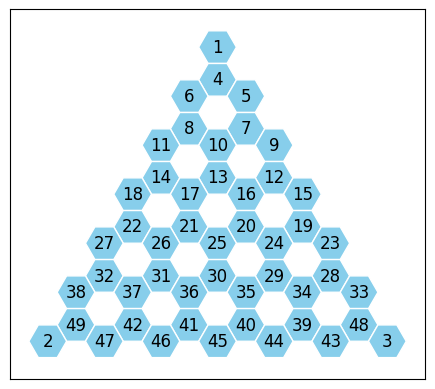

In [13]:
# Specifying no arguments plots an empty hex maze!
print("Here is an empty hex maze with no barriers:")
plot_hex_maze()

# This is equivalent to the following:
# plot_hex_maze(None)
# plot_hex_maze(barriers=None)

# 2. Plot a single barrier change hex maze configuration

We can also use the `plot_hex_maze` function to visualize a barrier change. To do this, we specify the `old_barrier` hex and `new_barrier` hex as additional arguments along with the barrier set.

Here is a hex maze indicating a barrier change from hex 41 to hex 16:


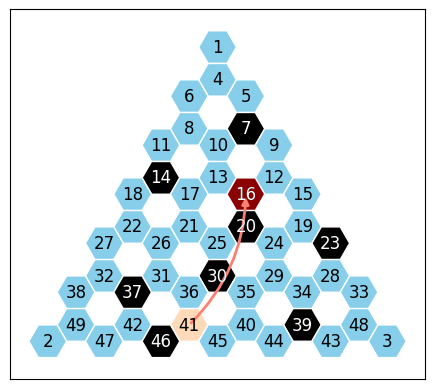

In [14]:
# This is an example maze in a barrier sequence that was created by moving a barrier from hex 41 to hex 16.
example_maze = {37, 39, 7, 46, 14, 16, 20, 23, 30}
old_barrier_hex = 41
new_barrier_hex = 16

# Use the function plot_hex_maze to visualize this barrier change configuration.
print("Here is a hex maze indicating a barrier change from hex 41 to hex 16:")
plot_hex_maze(example_maze, old_barrier=old_barrier_hex, new_barrier=new_barrier_hex)

This plot is the same as before, but the now-open hex where the barrier used to be (hex 41) is shown in pale red. The location where this barrier was moved to (hex 16) is shown in dark red. The movement of the barrier is shown by a pink arrow from the old barrier hex to the new barrier hex.

### Customizing the plot using different plotting options

The same options as shown above (`show_barriers`, `show_choice_points`, `show_optimal_paths`, `show_stats`) can also be used to customize a barrier change configuration. 
There are also additional arguments specific to barrier changes:

To remove the arrow indicating the barier movement, add the optional argument `show_arrow=False`. This argument is True by default if `old_barrier` and `new_barrier` are specified.

To not highlight the `old_barrier` and `new_barrier` hexes in light red and dark red, add the optional argument `show_barrier_change=False`. This argument is True by default if `old_barrier` and `new_barrier` are specified.

&rarr; Note that if `show_arrow` or `show_barrier_change` are specified but no barrier change is specified (`old_barrier` and `new_barrier` args are not provided), `show_arrow` or `show_barrier_change` will be ignored.

Here is a barrier change configuration without the movement arrow:


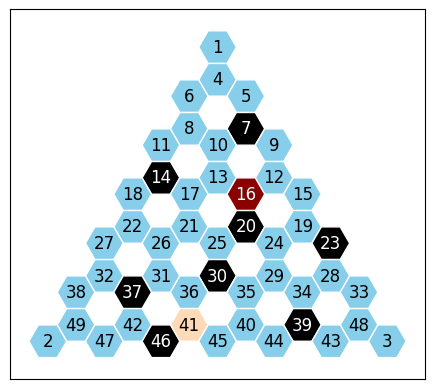

Here is a barrier change configuration without highlighting the old_barrier and new_barrier locations:


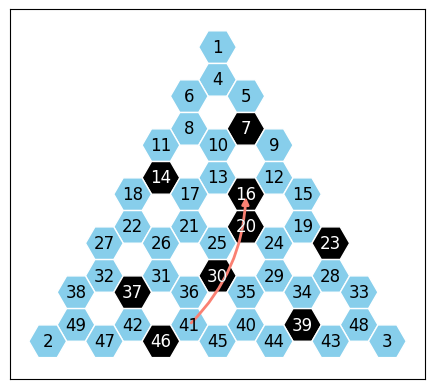

Here is a barrier change configuration only showing the open hexes.      
Note that because no barriers are shown, only the old barrier location is highlighted:


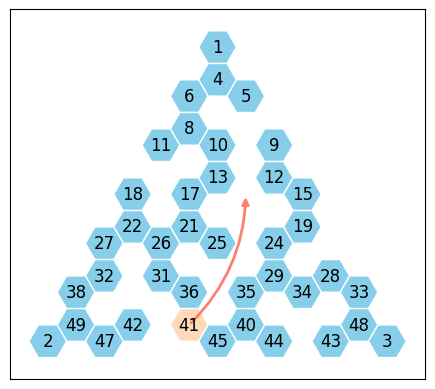

In [15]:
# This is an example maze in a barrier sequence that was created by moving a barrier from hex 41 to hex 16.
example_maze = {37, 39, 7, 46, 14, 16, 20, 23, 30}
old_barrier_hex = 41
new_barrier_hex = 16

# Plot the barrier change configuration without showing the movement arrow
print("Here is a barrier change configuration without the movement arrow:")
plot_hex_maze(example_maze, old_barrier=old_barrier_hex, new_barrier=new_barrier_hex, show_arrow=False)

# Plot the barrier change configuration without highlighting the old_barrier and new_barrier locations
print("Here is a barrier change configuration without highlighting the old_barrier and new_barrier locations:")
plot_hex_maze(example_maze, old_barrier=old_barrier_hex, new_barrier=new_barrier_hex, show_barrier_change=False)

# We can use additional arguments to further customize the plot!
# Plot a barrier change configuration only showing the open hexes
print("Here is a barrier change configuration only showing the open hexes.\
      \nNote that because no barriers are shown, only the old barrier location is highlighted:")
plot_hex_maze(example_maze, old_barrier=old_barrier_hex, new_barrier=new_barrier_hex, show_barriers=False)

# 3. Plot a barrier change sequence

Often we don't want to visualize a barrier change on a single maze - we want to plot the entire barrier change sequence. 

We can do this with the function `plot_barrier_change_sequence`.

Let's take a look at the documentation for this function:

In [16]:
# View the documentation for this function
help(plot_barrier_change_sequence)

Help on function plot_barrier_change_sequence in module src.hexmaze.plotting:

plot_barrier_change_sequence(barrier_sequence: list[set], print_barrier_info=True, same_plot=False, **kwargs)
    Given a sequence of barrier sets that each differ by the movement of
    a single barrier, plot each maze in the sequence with the moved barriers
    indicated on each maze.

    Open hexes are shown in light blue. By default, barriers are shown
    in black, and choice point(s) are shown in yellow.
    The now-open hex where the barrier used to be is shown in pale red.
    The new barrier is shown in dark red. An arrow indicating the movement
    of the barrier from the old hex to the new hex is shown in pink.

    Parameters:
        barrier_sequence (list[set]): List of sequential barrier sets
        print_barrier_info (bool): Optional. Print each barrier set and the
            barrier moved between barrier sets. Defaults to True
        same_plot (bool). Optional. Prints all mazes in a sing

Now let's use the function to plot a barrier change sequence! 

By default, it will also print some info about this sequence. To suppress this output and only get the graphs, add the optional argument `print_barrier_info=False`.

Here is the default way of plotting a barrier change sequence:
Maze 0: {37, 7, 39, 41, 14, 46, 20, 23, 30}


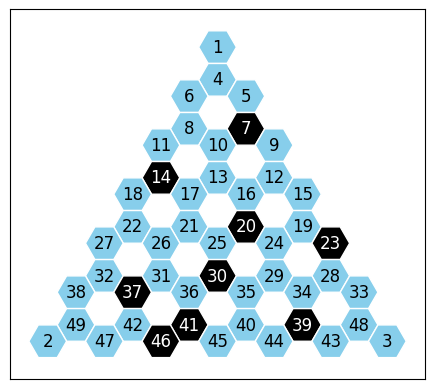

Barrier change: 41 -> 16
Maze 1: {37, 39, 7, 46, 14, 16, 20, 23, 30}


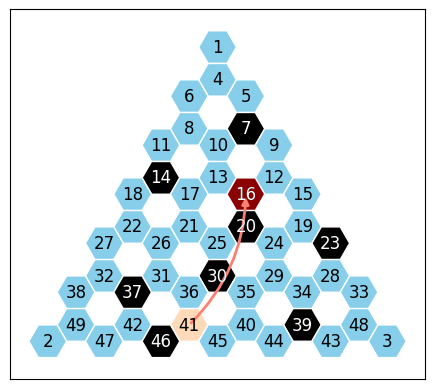

Barrier change: 16 -> 18
Maze 2: {37, 39, 7, 46, 14, 18, 20, 23, 30}


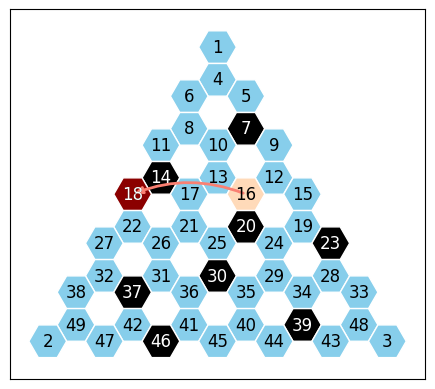

Barrier change: 37 -> 26
Maze 3: {39, 7, 46, 14, 18, 20, 23, 26, 30}


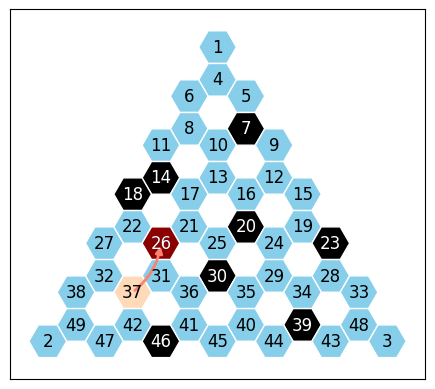

Barrier change: 30 -> 35
Maze 4: {35, 39, 7, 46, 14, 18, 20, 23, 26}


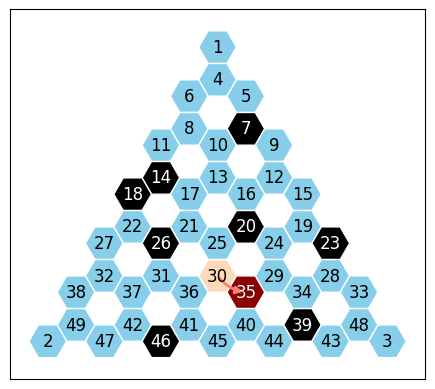

In [17]:
# Barrier change sequences are represented as a list of sequential sets of barriers.
example_barrier_sequence = [{37, 7, 39, 41, 14, 46, 20, 23, 30}, {37, 39, 7, 46, 14, 16, 20, 23, 30},
                            {37, 39, 7, 46, 14, 18, 20, 23, 30}, {39, 7, 46, 14, 18, 20, 23, 26, 30}, 
                            {35, 39, 7, 46, 14, 18, 20, 23, 26}]


# Use the function plot_barrier_change_sequence to visualize this barrier change sequence.
print("Here is the default way of plotting a barrier change sequence:")
plot_barrier_change_sequence(example_barrier_sequence)

That's it! Notice that here, we don't have to specify the old and new barrier locations - `plot_barrier_change_sequence` calculates these automatically based on which barriers are different between sets. 

## Plot a barrier change sequence all on the same plot
Add the argument `same_plot=True` to plot all of the mazes in a row on the same plot instead of in separate plots

Here is a barrier sequence plotted as a row in the same plot (same_plot=True):


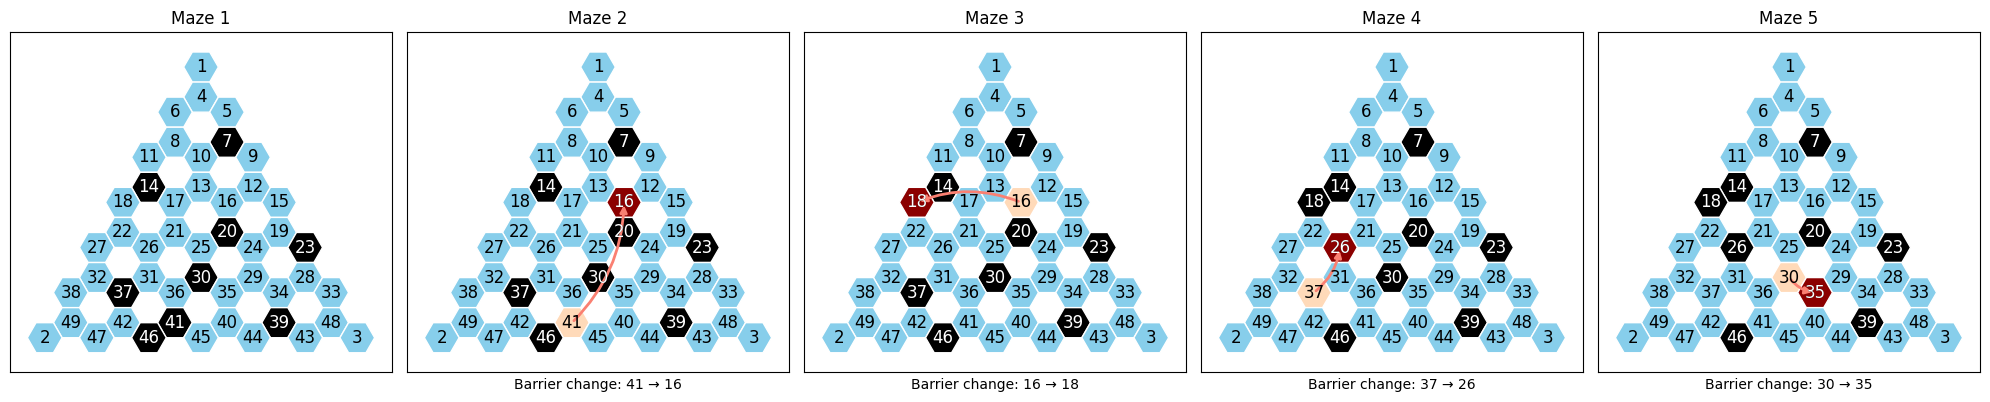

In [18]:
# Barrier change sequences are represented as a list of sequential sets of barriers.
example_barrier_sequence = [{37, 7, 39, 41, 14, 46, 20, 23, 30}, {37, 39, 7, 46, 14, 16, 20, 23, 30},
                            {37, 39, 7, 46, 14, 18, 20, 23, 30}, {39, 7, 46, 14, 18, 20, 23, 26, 30},
                            {35, 39, 7, 46, 14, 18, 20, 23, 26}]


# Use the function plot_barrier_change_sequence to visualize this barrier change sequence.
print("Here is a barrier sequence plotted as a row in the same plot (same_plot=True):")
plot_barrier_change_sequence(example_barrier_sequence, same_plot=True)

### Customizing the plot using different plotting options

The same options for `plot_hex_maze` (`show_barriers`, `show_choice_points`, `show_optimal_paths`, `show_stats`, `show_arrow`, `show_barrier_change`) can also be used to customize plots in a barrier change configuration. This works in both the `same_plot=True` and `same_plot=False` modes.

Let's customize our plots to highlight the optimal paths between reward ports and not highlight the barrier change hexes, so we can easily visualize how the rat's experience of the maze changes with our barrier changes.

Here is a barrier change sequence with optimal paths highlighted, no barriers shown, path lengths shown, and the barrier change hexes not highlighted:


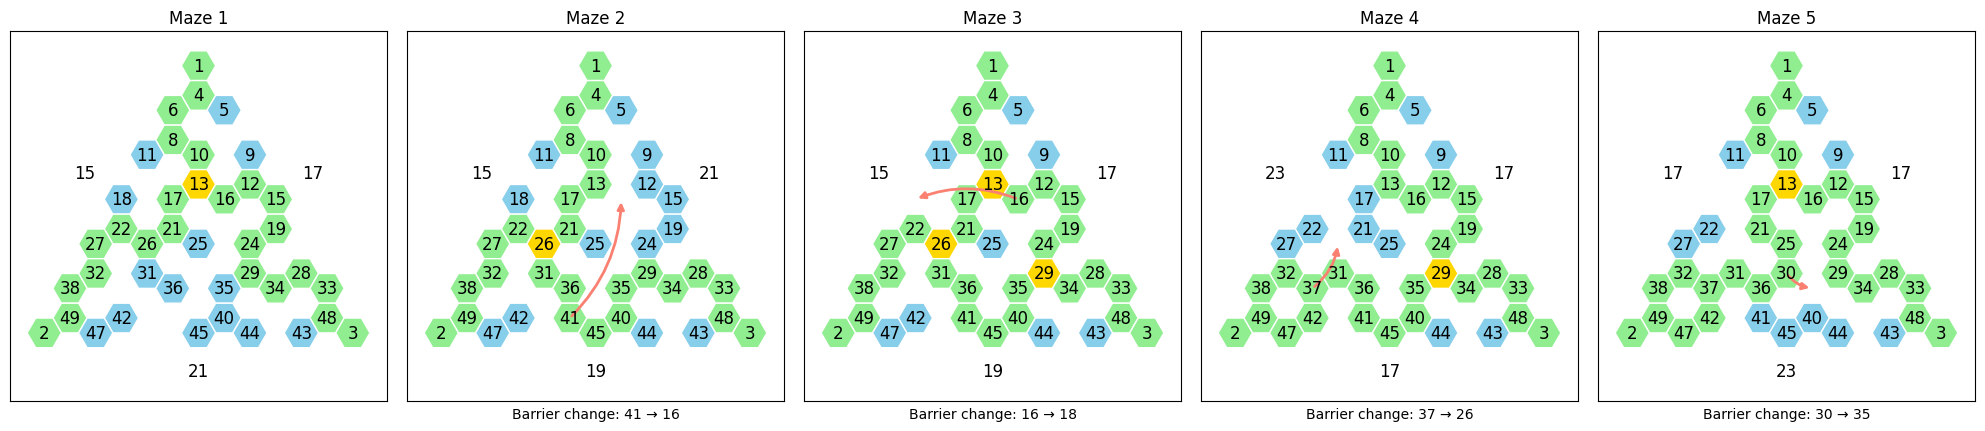

Another fun customization option! (show_barrier_changes=False, same_plot=True)


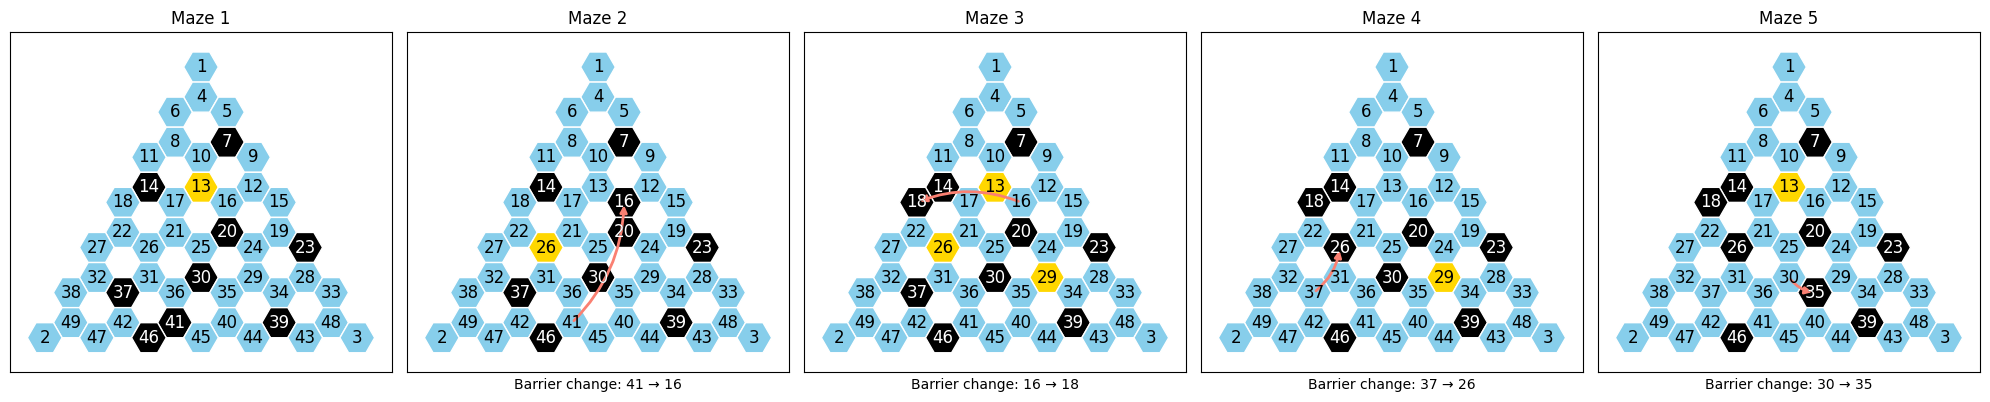

Another option! Permanent barriers shown and all text removed 
(show_barrier_change=False, show_choice_points=False, show_stats=False, show_permanent_barriers=True, show_hex_labels=False, same_plot=True


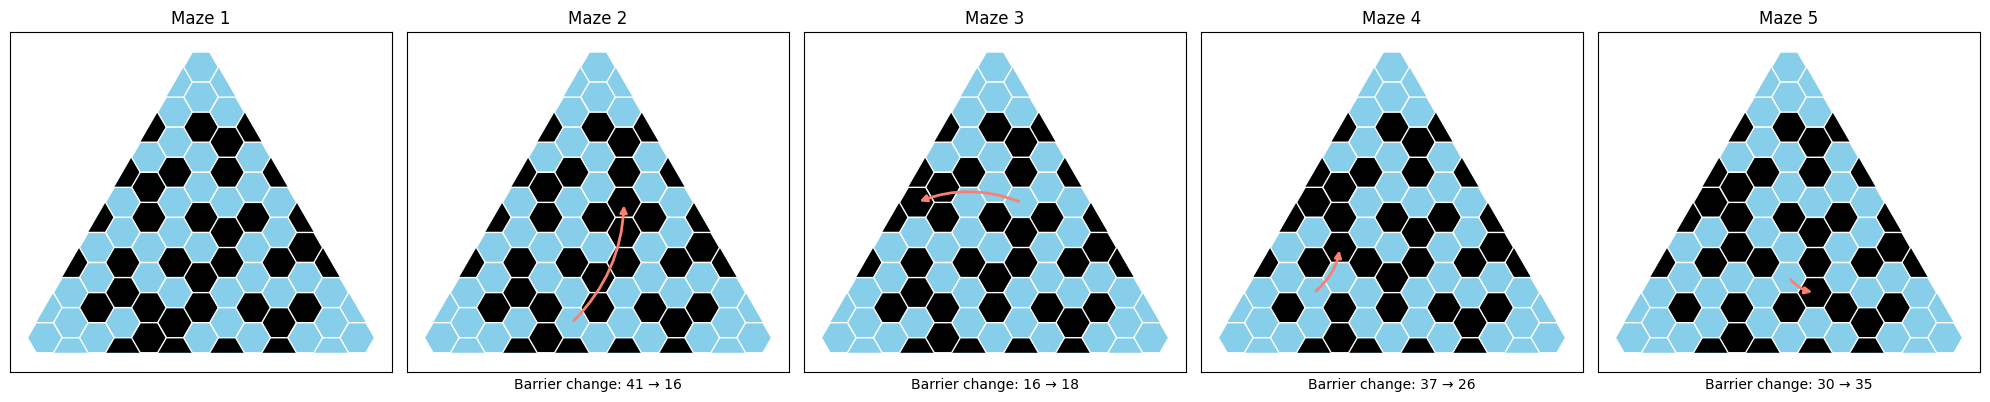

In [19]:
# Barrier change sequences are represented as a list of sequential sets of barriers.
example_barrier_sequence = [{37, 7, 39, 41, 14, 46, 20, 23, 30}, {37, 39, 7, 46, 14, 16, 20, 23, 30},
                            {37, 39, 7, 46, 14, 18, 20, 23, 30}, {39, 7, 46, 14, 18, 20, 23, 26, 30}, 
                            {35, 39, 7, 46, 14, 18, 20, 23, 26}]


# Visualize the barrier change sequence with the optimal paths highlighted
print("Here is a barrier change sequence with optimal paths highlighted, no barriers shown, path lengths shown, and the barrier change hexes not highlighted:")
plot_barrier_change_sequence(example_barrier_sequence, show_stats=True, show_choice_points=True, show_optimal_paths=True, show_barriers=False, show_barrier_change=False, same_plot=True)

print("Another fun customization option! (show_barrier_changes=False, same_plot=True)")
plot_barrier_change_sequence(example_barrier_sequence, show_choice_points=True, show_barrier_change=False, same_plot=True)

print("Another option! Permanent barriers shown and all text removed \n(show_barrier_change=False, show_choice_points=False, show_stats=False, show_permanent_barriers=True, show_hex_labels=False, same_plot=True")
plot_barrier_change_sequence(example_barrier_sequence, show_barrier_change=False, show_choice_points=False, show_stats=False, show_permanent_barriers=True, show_hex_labels=False, same_plot=True)

# 4. Visually compare 2 maze configurations

We can use `plot_hex_maze_comparison` to print comparison info and highlight the hexes different on optimal paths between the 2 mazes. 

By default, barriers are not shown to make paths more clear. Optimal path lengths are shown on the plot by default.

The same options for `plot_hex_maze` can be used to further customize the plot.

In [20]:
from src.hexmaze import plot_hex_maze_comparison

# View the documentation for this function
help(plot_hex_maze_comparison)

Help on function plot_hex_maze_comparison in module src.hexmaze.plotting:

plot_hex_maze_comparison(maze_1, maze_2, print_info=True, **kwargs)
    Given 2 hex mazes, plot each maze highlighting the different hexes the
    rat must run through on optimal paths between reward ports. Used for comparing
    how different 2 mazes are.

    Open hexes are shown in light blue. By default, barriers are not shown.
    Changes in optimal paths between the mazes are highlighted in orange.

    Parameters:
        maze_1 (list, set, frozenset, np.ndarray, str, nx.Graph):
            The first hex maze represented in any valid format
        maze_2 (list, set, frozenset, np.ndarray, str, nx.Graph):
            The second hex maze represented in any valid format
        print_info (bool): Optional. Print the hexes different on optimal paths between the mazes.
            Defaults to True

        show_barriers (bool): If the barriers should be shown as black hexes and labeled.
            If False, 

Hexes on optimal paths in the first maze but not the second: {12, 13, 15, 16, 17, 19, 21, 24}
Hexes on optimal paths in the second maze but not the first: {35, 36, 40, 41, 45, 17, 21, 26, 31}
There are 15 hexes different on optimal paths between the 2 mazes.


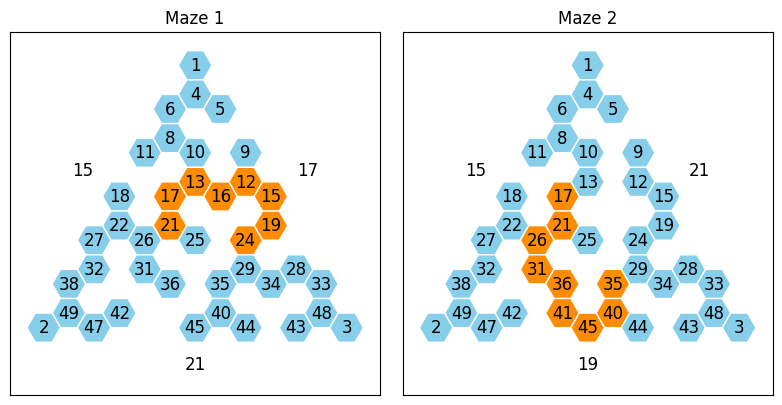

In [21]:
from src.hexmaze import plot_hex_maze_comparison

# Example mazes to compare
maze1 = {37, 7, 39, 41, 14, 46, 20, 23, 30}
maze2 = {37, 39, 7, 46, 14, 16, 20, 23, 30}

# Compare the mazes
plot_hex_maze_comparison(maze1, maze2)

When computing maze similarity (number of hexes different on optimal paths), we count each changed hex that a rat must run through on an optimal path between reward ports exactly once. For example, given the following:

`Hexes on optimal paths in the first maze but not the second: {12, 13, 15, 16, 17, 19, 21, 24}.`

`Hexes on optimal paths in the second maze but not the first: {35, 36, 40, 41, 45, 17, 21, 26, 31}`

This results in a count of `15` hexes different on optimal paths.

Note that the same hex (e.g. hex 17) may appear on both lists. This is because in maze 1, hex 17 exists on the optimal path between port 2 and port 3, but not on the optimal path between ports 1 and 3. In maze 2, hex 17 exists on the optimal path between ports 1 and 3, but not on the optimal path between ports 2 and 3.

Also note that hex 13 is counted as a changed hex even though in both mazes, it is on the optimal path between ports 1 and 2. However, in maze 1, it is on the optimal path between ports 2 and 3. In maze 2, it is not.

Our count of `15` reflects the size of the combined sets: {21, 17, 13, 16, 12, 15, 19, 24, 26, 31, 36, 41, 45, 40, 35}. Note that we choose not to count hex 17 and hex 21 twice even though they appear on both lists. 

# 4a. Visually compare 2 maze configurations (path breakdown)

We can use `plot_hex_maze_path_comparison` to print comparison info and and highlight the hexes different on optimal paths between the 2 mazes. 

By default, barriers are not shown to make paths more clear. Optimal path lengths are shown on the plot by default.

The same options for `plot_hex_maze` can be used to further customize the plot.

In [22]:
from src.hexmaze import plot_hex_maze_path_comparison

# View the documentation for this function
help(plot_hex_maze_path_comparison)

Help on function plot_hex_maze_path_comparison in module src.hexmaze.plotting:

plot_hex_maze_path_comparison(maze_1, maze_2, print_info=True, **kwargs)
    Given 2 hex mazes, plot each maze highlighting the different hexes the
    rat must run through on optimal paths between reward ports. Creates a 2x3
    plot, with each column highlighting the differences in paths between each
    pair of reward ports. Used for comparing how different 2 mazes are.

    Open hexes are shown in light blue. By default, barriers are not shown.
    Optimal paths between ports are highlighted in light green.
    Changes in optimal paths between the mazes are highlighted in orange.

    Parameters:
        maze_1 (list, set, frozenset, np.ndarray, str, nx.Graph):
            The first hex maze represented in any valid format
        maze_2 (list, set, frozenset, np.ndarray, str, nx.Graph):
            The second hex maze represented in any valid format
        print_info (bool): Optional. Print the hexes 

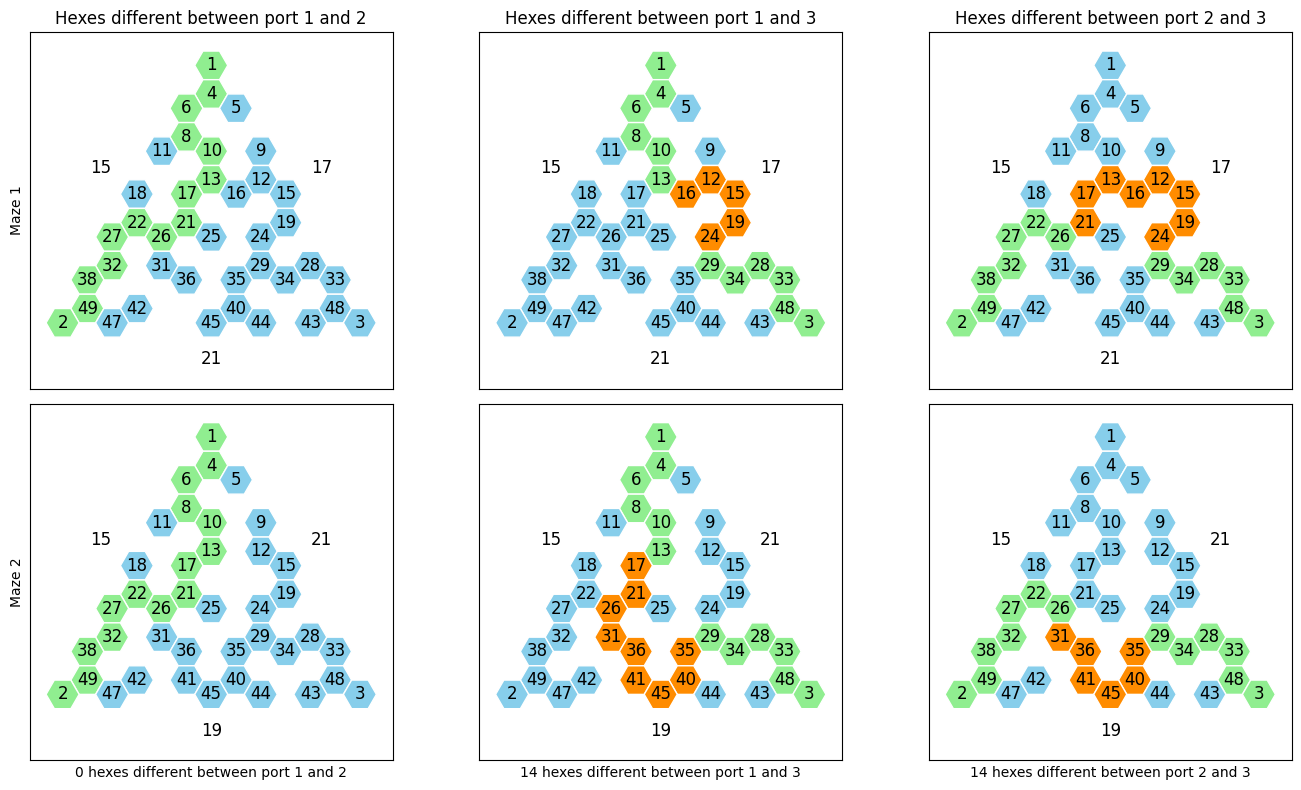

Hexes on optimal paths in maze 1 but not maze 2: {12, 13, 15, 16, 17, 19, 21, 24}
Hexes on optimal paths in maze 2 but not maze 1: {35, 36, 40, 41, 45, 17, 21, 26, 31}
There are 15 hexes different across all optimal paths (not double counting hexes).


In [23]:
# Example mazes to compare
maze1 = {37, 7, 39, 41, 14, 46, 20, 23, 30}
maze2 = {37, 39, 7, 46, 14, 16, 20, 23, 30}

# Compare the mazes
plot_hex_maze_path_comparison(maze1, maze2)

# 5. Visually evaluate a barrier sequence

We can use `plot_evaluate_maze_sequence` to print comparison plots between each maze in a barrier sequence and all othber mazes in the sequence. 

For the maze being evaluated, optimal paths are highlighted in green. Differences in optimal paths on this maze and all other mazes in the sequence are highlighted in orange.

If desired, the plots can be customized using the additional plotting arguments available to `plot_hex_maze`.

In [24]:
from src.hexmaze import plot_evaluate_maze_sequence

# View the documentation for this function
help(plot_evaluate_maze_sequence)

Help on function plot_evaluate_maze_sequence in module src.hexmaze.plotting:

plot_evaluate_maze_sequence(barrier_sequence: list[set], **kwargs)
    Given a sequence of barrier sets that each differ by the movement of
    a single barrier, plot each maze in the sequence showing a comparison of
    how different it is from every other maze in the sequence.

    Open hexes are shown in light blue. By default, barriers are not shown.
    The reference maze has optimal paths highlighted in green. It is shown
    in a row compared to all other mazes in the sequence, where hexes on
    optimal paths in the other maze that are not on optimal paths in the
    reference maze are highlighted in orange.

    Parameters:
        barrier_sequence (list[set]): List of sequential barrier sets

        show_barriers (bool): If the barriers should be shown as black hexes and labeled.
            If False, only open hexes are shown. Defaults to False
        show_choice_points (bool): If the choice poin

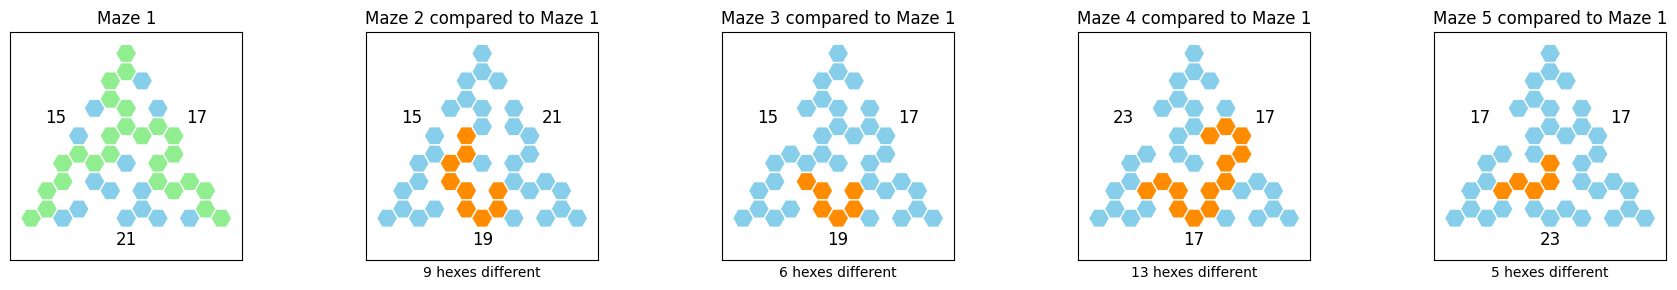

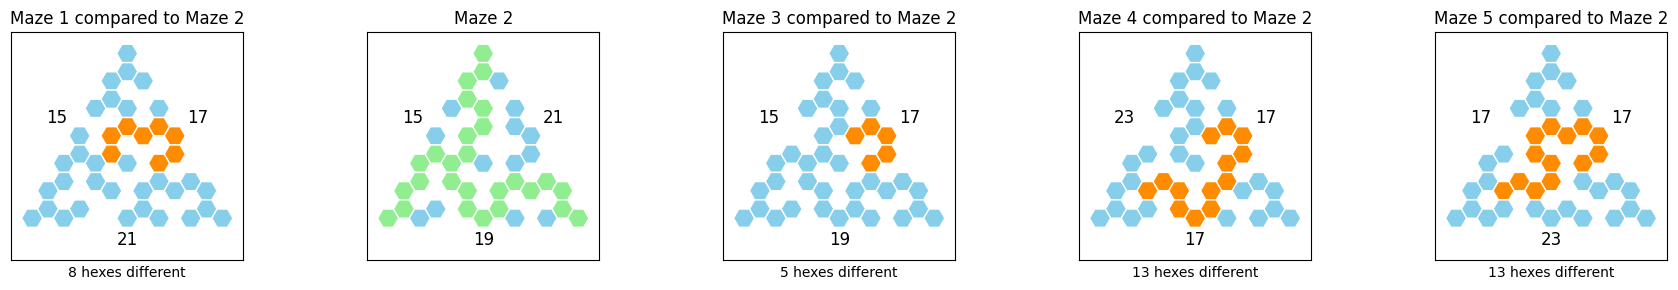

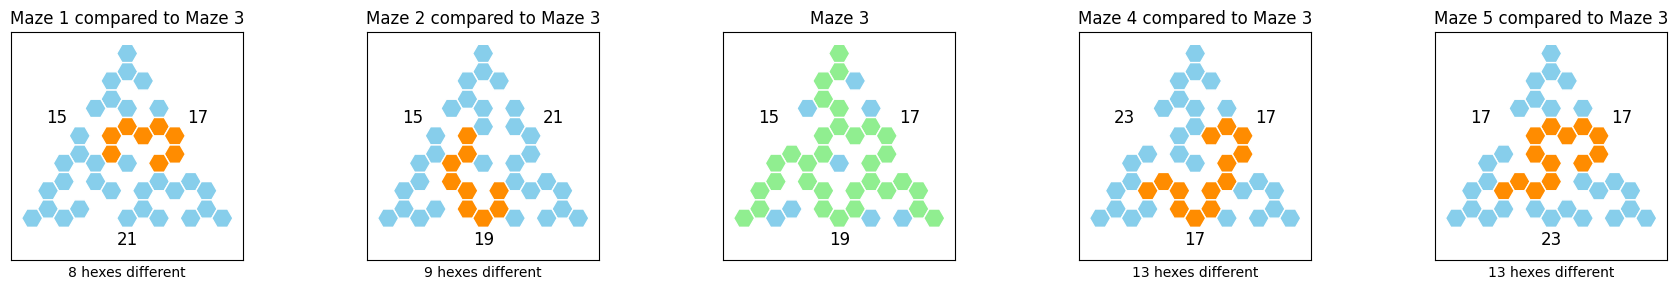

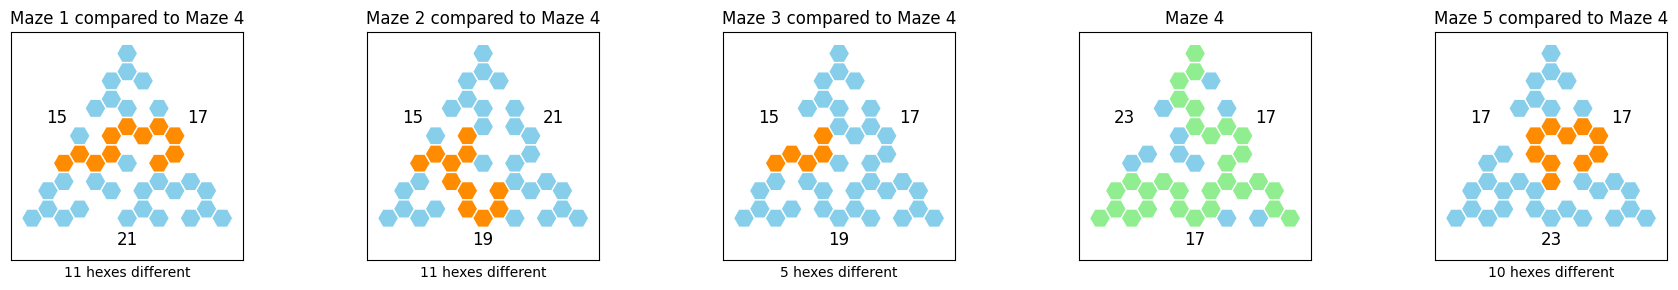

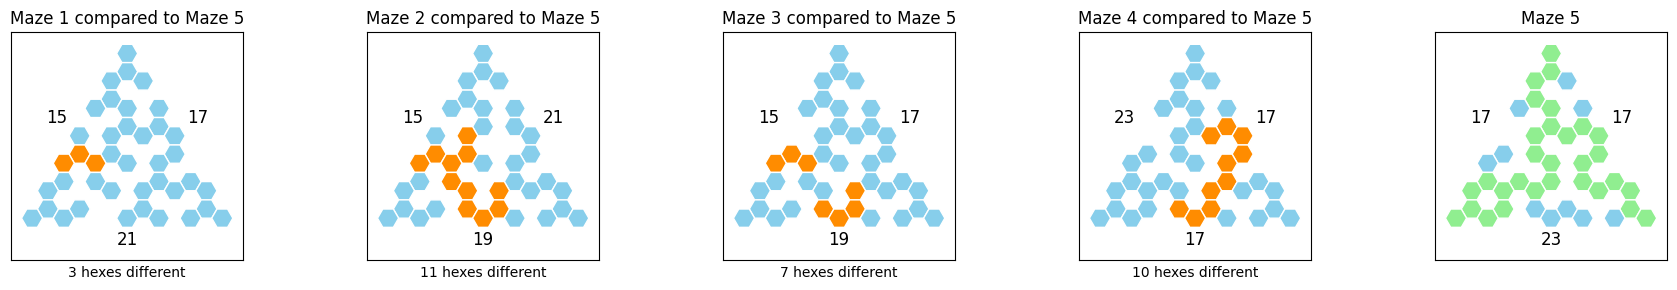

In [25]:
from src.hexmaze import plot_evaluate_maze_sequence

# Example barrier sequence to evaluate
example_barrier_sequence = [{37, 7, 39, 41, 14, 46, 20, 23, 30}, {37, 39, 7, 46, 14, 16, 20, 23, 30},
                            {37, 39, 7, 46, 14, 18, 20, 23, 30}, {39, 7, 46, 14, 18, 20, 23, 26, 30}, 
                            {35, 39, 7, 46, 14, 18, 20, 23, 26}]


# Plot an evaluation of a barrier sequence
plot_evaluate_maze_sequence(example_barrier_sequence)